In [1]:
import pandas as pd
import numpy as np

from google.colab import files

uploaded = files.upload()

Saving market_ETL.csv to market_ETL.csv


In [2]:
market = pd.read_csv('market_ETL.csv')
market.head()

,id,idade_empresa_anos,"de_faixa_faturamento_estimado_ATE R$ 81.000,00","de_faixa_faturamento_estimado_DE R$ 1.500.000,01 A R$ 4.800.000,00","de_faixa_faturamento_estimado_DE R$ 10.000.000,01 A R$ 30.000.000,00","de_faixa_faturamento_estimado_DE R$ 100.000.000,01 A R$ 300.000.000,00","de_faixa_faturamento_estimado_DE R$ 30.000.000,01 A R$ 100.000.000,00","de_faixa_faturamento_estimado_DE R$ 300.000.000,01 A R$ 500.000.000,00","de_faixa_faturamento_estimado_DE R$ 360.000,01 A R$ 1.500.000,00","de_faixa_faturamento_estimado_DE R$ 4.800.000,01 A R$ 10.000.000,00","de_faixa_faturamento_estimado_DE R$ 500.000.000,01 A 1 BILHAO DE REAIS","de_faixa_faturamento_estimado_DE R$ 81.000,01 A R$ 360.000,00","de_faixa_faturamento_estimado_grupo_ATE R$ 81.000,00","de_faixa_faturamento_estimado_grupo_DE R$ 1.500.000,01 A R$ 4.800.000,00","de_faixa_faturamento_estimado_grupo_DE R$ 10.000.000,01 A R$ 30.000.000,00","de_faixa_faturamento_estimado_grupo_DE R$ 100.000.000,01 A R$ 300.000.000,00","de_faixa_faturamento_estimado_grupo_DE R$ 30.000.000,01 A R$ 100.000.000,00","de_faixa_faturamento_estimado_grupo_DE R$ 300.000.000,01 A R$ 500.000.000,00","de_faixa_faturamento_estimado_grupo_DE R$ 360.000,01 A R$ 1.500.000,00","de_faixa_faturamento_estimado_grupo_DE R$ 4.800.000,01 A R$ 10.000.000,00","de_faixa_faturamento_estimado_grupo_DE R$ 500.000.000,01 A 1 BILHAO DE REAIS","de_faixa_faturamento_estimado_grupo_DE R$ 81.000,01 A R$ 360.000,00",de_faixa_faturamento_estimado_grupo_nan,de_faixa_faturamento_estimado_nan,de_nivel_atividade_BAIXA,de_nivel_atividade_MEDIA,de_nivel_atividade_MUITO BAIXA,de_nivel_atividade_nan,de_saude_rescencia_ATE 1 ANO,de_saude_rescencia_ATE 3 MESES,de_saude_rescencia_ATE 6 MESES,de_saude_rescencia_SEM INFORMACAO,de_saude_rescencia_nan,de_saude_tributaria_AZUL,de_saude_tributaria_CINZA,de_saude_tributaria_LARANJA,de_saude_tributaria_VERDE,de_saude_tributaria_VERMELHO,de_saude_tributaria_nan,fl_antt,...,nm_divisao_TELECOMUNICACOES,nm_divisao_TRANSPORTE AEREO,nm_divisao_TRANSPORTE AQUAVIARIO,nm_divisao_TRANSPORTE TERRESTRE,nm_divisao_nan,nm_meso_regiao_CENTRAL POTIGUAR,nm_meso_regiao_CENTRO AMAZONENSE,nm_meso_regiao_CENTRO MARANHENSE,nm_meso_regiao_CENTRO NORTE PIAUIENSE,nm_meso_regiao_LESTE MARANHENSE,nm_meso_regiao_LESTE POTIGUAR,nm_meso_regiao_NORTE AMAZONENSE,nm_meso_regiao_NORTE MARANHENSE,nm_meso_regiao_NORTE PIAUIENSE,nm_meso_regiao_OESTE MARANHENSE,nm_meso_regiao_OESTE POTIGUAR,nm_meso_regiao_SUDESTE PIAUIENSE,nm_meso_regiao_SUDOESTE AMAZONENSE,nm_meso_regiao_SUDOESTE PIAUIENSE,nm_meso_regiao_SUL AMAZONENSE,nm_meso_regiao_SUL MARANHENSE,nm_meso_regiao_VALE DO ACRE,nm_meso_regiao_VALE DO JURUA,nm_meso_regiao_nan,qt_filiais,qt_socios,qt_socios_st_regular,setor_COMERCIO,setor_CONSTRUÇÃO CIVIL,setor_INDUSTRIA,setor_SERVIÇO,setor_nan,sg_uf_AM,sg_uf_MA,sg_uf_PI,sg_uf_RN,sg_uf_RO,sg_uf_nan,vl_total_veiculos_leves_grupo,vl_total_veiculos_pesados_grupo
0,a6984c3ae395090e3bee8ad63c3758b110de096d5d8195...,14.46,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0,1,0,0,0,0,0,0,1,0,0,0,0
1,6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c4...,1.46,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0
2,4a7e5069a397f12fdd7fd57111d6dc5d3ba558958efc02...,7.09,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0
3,3348900fe63216a439d2e5238c79ddd46ede454df7b9d8...,6.51,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0
4,1f9bcabc9d3173c1fe769899e4fac14b053037b953a1e4...,3.20,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0


In [4]:
import seaborn as sns
import plotly.graph_objs as go
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from scipy import stats

market = market.drop(columns=['id'])
#To fixate the results between attempts we'll set the random state to 42
random_state = 42

pca = PCA(n_components = None, random_state = random_state)
pca_p1 = pca.fit_transform(market)
pca.explained_variance_ratio_

array([5.13577097e-01, 3.16367479e-01, 1.16681953e-01, 3.04444235e-02,
       1.37712970e-02, 1.15833535e-03, 9.89241921e-04, 5.44170582e-04,
       4.88922814e-04, 4.70091541e-04, 4.20455367e-04, 4.08022936e-04,
       3.72617880e-04, 3.55215650e-04, 2.90136679e-04, 2.81084436e-04,
       2.39083830e-04, 2.27227123e-04, 1.77949623e-04, 1.60627622e-04,
       1.39175095e-04, 1.29046547e-04, 1.17761866e-04, 1.16209260e-04,
       1.03161874e-04, 9.43626437e-05, 8.18984447e-05, 7.78196417e-05,
       7.56367732e-05, 7.35114133e-05, 7.16606470e-05, 6.87109879e-05,
       6.77167635e-05, 6.41203678e-05, 6.36427626e-05, 5.79023059e-05,
       5.17066820e-05, 4.89118197e-05, 4.84542691e-05, 4.58290869e-05,
       4.23872769e-05, 4.12100600e-05, 3.99039694e-05, 3.86621865e-05,
       3.58791720e-05, 3.49899737e-05, 3.44370298e-05, 3.39516216e-05,
       3.11190429e-05, 2.99307873e-05, 2.82896528e-05, 2.77815011e-05,
       2.66741187e-05, 2.44812757e-05, 2.34354678e-05, 1.98532735e-05,
      

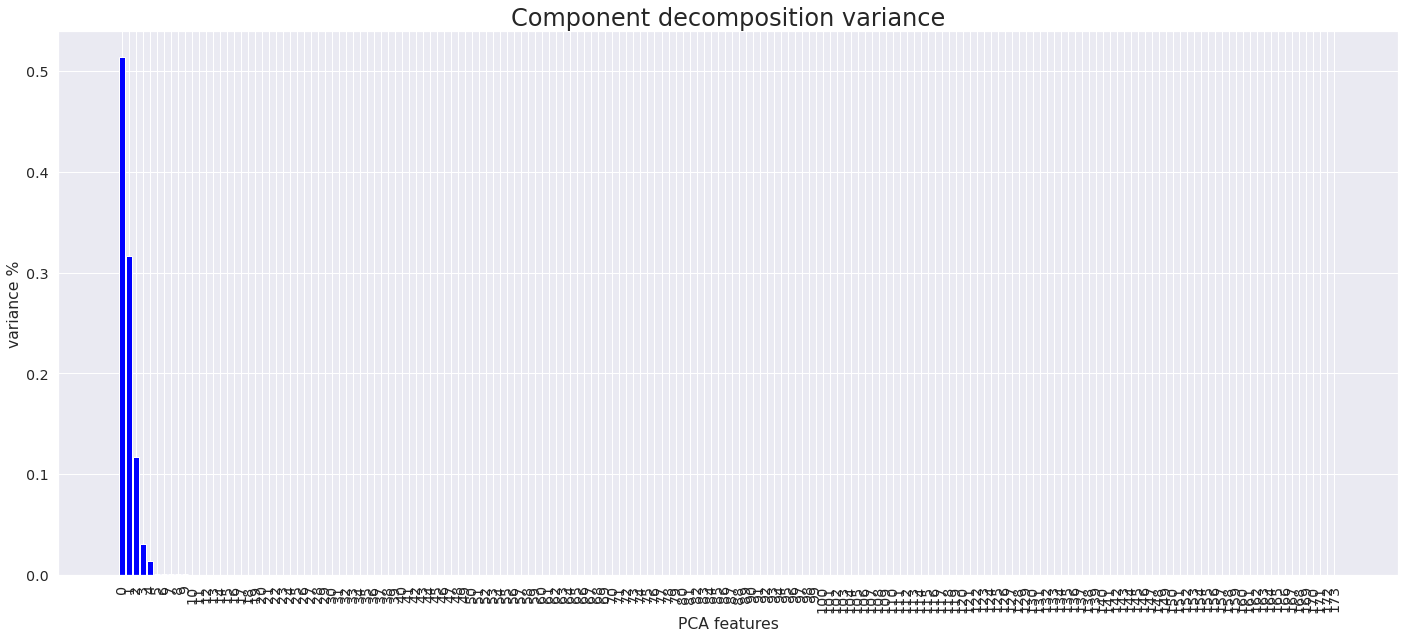

In [5]:
sns.set(font_scale = 1.3)
features = range(pca.n_components_)
plt.figure(figsize=(24,10))
plt.bar(features, pca.explained_variance_ratio_, color='blue')
plt.title("Component decomposition variance", fontsize=24)
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(rotation=90)
plt.xticks(features)
plt.show()

In [6]:
#Just so we can fix a point between attempts we'll work with every compononet that is higher that 2.5%
components_limit = 0.025
components = pca.explained_variance_ratio_[pca.explained_variance_ratio_ > components_limit]
number_components = len(components)

pca = PCA(n_components = number_components, random_state = random_state) 
X = pca.fit_transform(market)
pca.explained_variance_ratio_, sum(pca.explained_variance_ratio_)

(array([0.5135771 , 0.31636748, 0.11668195, 0.03044442]), 0.9770709518336236)

In [14]:
pca = PCA(n_components = number_components, random_state = random_state)
pca_market = pca.fit_transform(market)
inverse_transform_market = pca.inverse_transform(pca_market)

print("portfolio1 shape",market.shape)
print("pca_market shape",pca_market.shape)
print("inverse_transform_p1 market",inverse_transform_market.shape)

portfolio1 shape (462298, 174)
pca_market shape (462298, 4)
inverse_transform_p1 market (462298, 174)


In [15]:
MSE_score = ((market-inverse_transform_market)**2).sum(axis=1)

MSE_score.sort_values(ascending=False)

459909    72997.611989
378897    67845.865401
415343    49941.588549
255411    34919.368985
273044    31875.095111
              ...     
41516         2.678762
183446        2.676132
76758         2.675726
84392         2.653310
176368        2.623331
Length: 462298, dtype: float64

In [16]:
#Interquartile Range Method
q25, q75 = np.percentile(MSE_score, 25), np.percentile(MSE_score, 75)
iqr = q75 - q25

print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))

Percentiles: 25th=5.233, 75th=7.343, IQR=2.110


In [17]:
cut_off = iqr * 1.5
upper = q75 + cut_off
upper, cut_off

(10.508197507119265, 3.164964393650196)

In [18]:
outliers = [x for x in MSE_score if x > upper]
print('Identified outliers: %d' % len(outliers))
len(MSE_score)

Identified outliers: 36077


462298

In [20]:
outliers_removed = [x for x in  MSE_score if x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))

Non-outlier observations: 426221


In [21]:
MSE_array = np.array(MSE_score)

indices = [np.where(MSE_array==x)[0][0] for x in outliers_removed]
no_outliers_market = market.iloc[indices]
no_outliers_market.shape

(426221, 174)

In [22]:
no_outliers_market.to_csv('market_no_outliers.csv') 
files.download('market_no_outliers.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>